In [13]:
# Dependencies
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Import csv file as DataFrame
yc_df = pd.read_csv("yelp_census_data.csv")
yc_df.head()

,Median Age,Population,White,Black,Asian,Hispanic,Poverty Count,Household Income,Per Capita Income,Zip Code,Review Count,Average Rating,Rating Delta
0,22.0,9337,5974,1637,713,2160,815,49279,17884,92310,208,2.51,1.0
1,41.3,657,321,0,9,532,21,68750,21025,95653,772,3.04,1.0
2,45.8,232,232,0,0,76,13,38984,19150,95698,873,3.09,1.0
3,35.2,430,186,0,0,348,35,75708,22071,95697,1034,3.20,1.0
4,47.8,3882,3359,100,175,1134,381,75466,37323,95258,1498,3.22,1.0


In [15]:
#Include Poverty Rate
poverty_rate = yc_df["Poverty Count"]/yc_df["Population"]*100

#Structure the Dataframe
yc_fin_df = pd.DataFrame({"Zip Code": yc_df["Zip Code"], 
                                 "Population": yc_df["Population"],
                                 "Poverty Rate": poverty_rate,
                                 "Household Income":yc_df["Household Income"],
                                 "Per Capita Income":yc_df["Per Capita Income"],
                                 "Review Count": yc_df["Review Count"],
                                 "Average Rating": yc_df["Average Rating"],
                                 "Average Delta": yc_df["Rating Delta"] })

#Average Delta is an arbitrary number system to give heavier weight towards ratings above 4 stars
#Update variables to limit to 2 decimal
yc_fin_df["Poverty Rate"] = yc_fin_df["Poverty Rate"].map("{:,.2f}".format)
yc_fin_df["Average Delta"] = yc_fin_df["Average Delta"].map("{:,.2f}".format)

yc_fin_top200 = yc_fin_df.nlargest(200, "Population")
yc_fin_top200rev = yc_fin_df.nlargest(200, "Review Count")
yc_fin_top200rev.head()

,Average Delta,Average Rating,Household Income,Per Capita Income,Population,Poverty Rate,Review Count,Zip Code
1042,5.31,4.25,61310,32007,28508,12.85,33720,92110
607,4.77,4.15,22058,33518,11668,44.81,33174,90013
606,4.77,4.15,32712,21989,32543,23.83,32356,90012
1195,5.53,4.29,83288,50098,18864,6.42,28940,92106
536,4.67,4.13,72200,53613,33873,9.49,28732,92103


In [16]:
yc_fin_df["Average Delta"] = pd.to_numeric(yc_fin_df["Average Delta"], downcast="float")
yc_fin_top200["Average Delta"] = pd.to_numeric(yc_fin_top200["Average Delta"], downcast="float")
yc_fin_top200rev["Average Delta"] = pd.to_numeric(yc_fin_top200rev["Average Delta"], downcast="float")

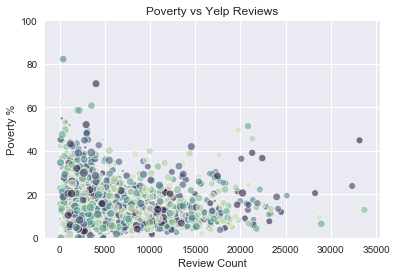

In [17]:
# All-in Bubble Plot of Poverty Rate vs Review Count with 'Average Delta' as Bubble size
plt.scatter(yc_fin_df["Review Count"],
            poverty_rate,
            s=yc_fin_df["Average Delta"]*10, c=sns.cubehelix_palette(8, start=.5, rot=-.75), 
            edgecolor="white", linewidths=1, marker="o", 
            alpha=0.6, label="Poverty")

# Incorporate the other graph properties
plt.title("Poverty vs Yelp Reviews")
plt.ylabel("Poverty %")
plt.xlabel("Review Count")
plt.ylim((0,100))
plt.grid(True)
sns.set()

plt.show()

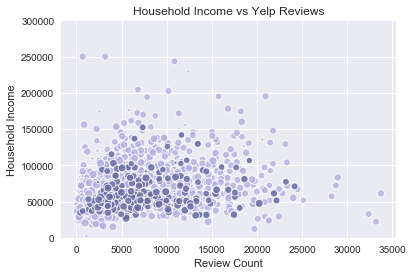

In [18]:
# All-in Bubble Plot of Household Income vs Review Count with 'Average Delta' as Bubble Size Top 200 Population
plt.scatter(yc_fin_df["Review Count"],
            yc_fin_df["Household Income"],
            s=yc_fin_df["Average Delta"]*10, c=sns.cubehelix_palette(start=2.8, rot=.1)[1], 
            edgecolor="white", linewidths=1, marker="o", 
            alpha=0.8, label="Poverty")

plt.scatter(yc_fin_top200["Review Count"],
            yc_fin_top200["Household Income"],
            s=yc_fin_top200["Average Delta"]*10, c=sns.cubehelix_palette(start=2.8, rot=.1)[3], 
            edgecolor="white", linewidths=1, marker="o", 
            alpha=0.8, label="Poverty")


# Incorporate the other graph properties
plt.title("Household Income vs Yelp Reviews")
plt.ylabel("Household Income")
plt.xlabel("Review Count")
plt.ylim((0,300000))
plt.grid(True)
sns.set()

plt.show()

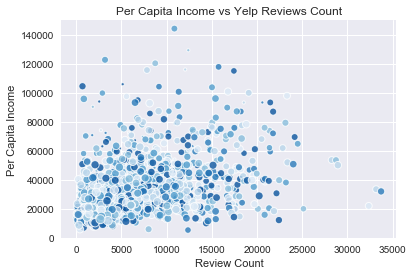

In [19]:
# All-in Bubble Plot of Per Capita Income vs Review Count with 'Average Delta' as Bubble Size
plt.scatter(yc_fin_df["Review Count"],
            yc_fin_df["Per Capita Income"],
            s=yc_fin_df["Average Delta"]*10, c=sns.color_palette("Blues"), 
            edgecolor="white", linewidths=1, marker="o", 
            alpha=0.8, label="Poverty")

# Incorporate the other graph properties
plt.title("Per Capita Income vs Yelp Reviews Count")
plt.ylabel("Per Capita Income")
plt.xlabel("Review Count")
plt.ylim((0,150000))
plt.grid(True)
sns.set()

plt.show()

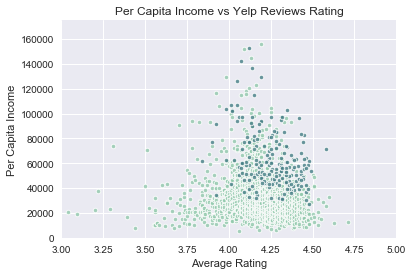

In [20]:
# Scatter plot of Per Capita Income vs Yelp Review Ratings Top 200 Population
plt.scatter(yc_fin_df["Average Rating"],
            yc_fin_df["Per Capita Income"],
            s=20, c=sns.cubehelix_palette(rot=-.4)[1], 
            edgecolor="white", linewidths=1, marker="o", 
            alpha=0.8, label="Poverty")

plt.scatter(yc_fin_top200["Average Rating"],
            yc_fin_top200["Household Income"],
            s=20, c=sns.cubehelix_palette(rot=-.4)[3], 
            edgecolor="white", linewidths=1, marker="o", 
            alpha=0.8, label="Poverty")

# Incorporate the other graph properties
plt.title("Per Capita Income vs Yelp Reviews Rating")
plt.ylabel("Per Capita Income")
plt.xlabel("Average Rating")
plt.ylim((0,175000))
plt.xlim((3,5))
plt.grid(True)
sns.set()

plt.show()

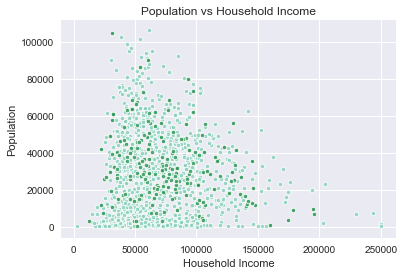

In [22]:
# Scatter Plot of Popluation vs Household income for Top 200 Review Count
plt.scatter(yc_fin_df["Household Income"],
            yc_fin_df["Population"],
            s=20, c=sns.color_palette("BuGn_r")[3], 
            edgecolor="white", linewidths=1, marker="o", 
            alpha=0.8, label="Poverty")

plt.scatter(yc_fin_top200rev["Household Income"],
            yc_fin_top200rev["Population"],
            s=20, c=sns.color_palette("BuGn_r")[1], 
            edgecolor="white", linewidths=1, marker="o", 
            alpha=0.8, label="Poverty")

# Incorporate the other graph properties
plt.title("Population vs Household Income")
plt.ylabel("Population")
plt.xlabel("Household Income")
plt.grid(True)
sns.set()

plt.show()

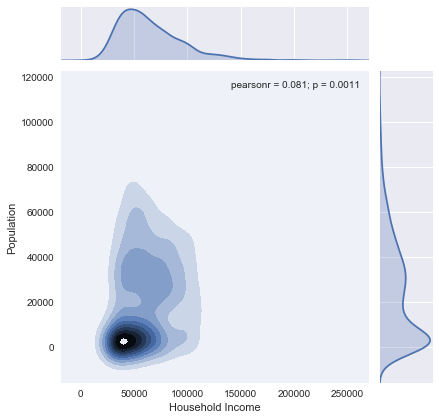

In [29]:
# Density Estimation Plot of Popluation vs Household income
hexplot = sns.jointplot(x=yc_fin_df["Household Income"], y=yc_fin_df["Population"], data=yc_fin_df, kind="kde");

plt.show()

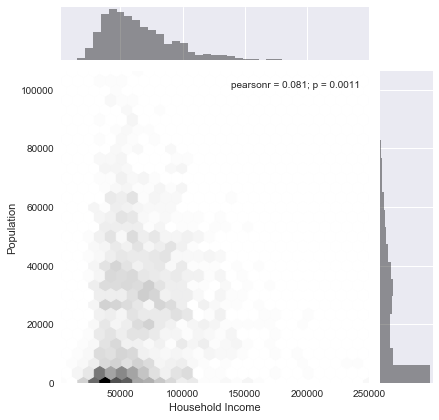

In [42]:
# Hex Plot of Popluation vs Household income
with sns.axes_style("darkgrid"):
    sns.jointplot(x=yc_fin_df["Household Income"], y=yc_fin_df["Population"], kind="hex", color="k");
plt.show()